# 데이터 로딩

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2021-09-23 21:35:59.760690: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10342946241792849680,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 23391698944
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14790155504738304849
 physical_device_desc: "device: 0, name: GeForce RTX 3090, pci bus id: 0000:67:00.0, compute capability: 8.6"]

2021-09-23 21:36:00.256902: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:0 with 22308 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:67:00.0, compute capability: 8.6


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('210923_total_freq_with_noise_2000point_2184kDa.csv')
df1 = data.values[:] # 문자열을 부동소수점형으로 변환한다
print(df1)

[[26535109.67 26567167.6  26580894.5  ... 26570477.78 26565810.
         0.  ]
 [26574844.17 26549031.86 26593563.88 ... 26586489.83 26553027.72
         0.  ]
 [26570524.56 26569427.83 26556841.96 ... 26553269.41 26550517.95
         0.  ]
 ...
 [26572887.28 26544204.73 26563963.86 ... 26511948.16 26566917.49
     50000.  ]
 [26575682.16 26594397.89 26562241.02 ... 26553808.2  26533587.67
     50000.  ]
 [26543655.13 26590903.11 26543954.87 ... 26528590.04 26528403.71
     50000.  ]]


# 데이터 살펴보기

152개의 속성 값이 있고, -1 또는 1로 레이블링 되어 있다.

152개 속성 값은 어떤 센서의 값을 시간을 두고 측정한 것이다.

In [7]:
df2_1 = data["target"]
df2 = df2_1[:]
print(df2)

0           0
1           0
2           0
3           0
4           0
        ...  
5495    50000
5496    50000
5497    50000
5498    50000
5499    50000
Name: target, Length: 5500, dtype: int64


In [8]:
target_count = np.unique(df2, return_counts=True)
print(target_count)

(array([    0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000,
       45000, 50000]), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))


In [9]:
target_count = np.unique(df2, return_counts=True)
print(target_count)

(array([    0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000,
       45000, 50000]), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))


target값 -1, 1을 category 인덱스 0, 1로 변경

In [10]:
df2 = df2.copy()
df2[df2 < 5000] = 0
df2[df2 == 5000] = 1
df2[df2 == 10000] = 2
df2[df2 == 15000] = 3
df2[df2 == 20000] = 4
df2[df2 == 25000] = 5
df2[df2 == 30000] = 6
df2[df2 == 35000] = 7
df2[df2 == 40000] = 8
df2[df2 == 45000] = 9
df2[df2 == 50000] = 10

target_count = np.unique(df2, return_counts=True)
print(target_count)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))


# 문제 정의

152개의 순차적인 센서 값을 가지고 분류한다.


# 데이터 준비


## x, y 쪼개기

In [11]:
x, y = df1[:,:-1], df2[:]

In [12]:
print(x.shape)
print(y.shape)

(5500, 4000)
(5500,)


In [13]:
y

0        0
1        0
2        0
3        0
4        0
        ..
5495    10
5496    10
5497    10
5498    10
5499    10
Name: target, Length: 5500, dtype: int64

## normalization

In [14]:
min = np.min(x)
max = np.max(x)
print(min, max)

x = (x-min) / (max-min)

min = np.min(x)
max = np.max(x)
print(min, max)


26464857.18 26650600.46
0.0 1.0


In [15]:
x = np.expand_dims(x, -1)

## 섞고

In [16]:
shuffled_index = np.random.permutation(len(x))
x = x[shuffled_index]
y = y.iloc[shuffled_index]
x, y = np.array(x), np.array(y)

## train, test 쪼개기

In [17]:
#split_index = int( len(x) * 0.8 )
#train_x, test_x = np.array(x[:split_index]), np.array(x[split_index:])
#train_y, test_y = np.array(y[:split_index]), np.array(y[split_index:])

In [18]:
#train_x[1].shape

In [19]:
#train_x[1]

# 모델 정의

In [20]:
import tensorflow as tf
from sklearn.model_selection import KFold 
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.utils import np_utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

2021-09-23 21:36:04.429689: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22308 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:67:00.0, compute capability: 8.6
2021-09-23 21:36:04.964140: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-09-23 21:36:05.952262: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2021-09-23 21:36:07.680480: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


8/8 [==============================] - 5s 190ms/step - loss: 2.3983 - accuracy: 0.0904 - val_loss: 2.3980 - val_accuracy: 0.0659
Epoch 2/100
8/8 [==============================] - 1s 81ms/step - loss: 2.3979 - accuracy: 0.0937 - val_loss: 2.3982 - val_accuracy: 0.0659
Epoch 3/100
8/8 [==============================] - 1s 82ms/step - loss: 2.3979 - accuracy: 0.0937 - val_loss: 2.3983 - val_accuracy: 0.0659
Epoch 4/100
8/8 [==============================] - 1s 81ms/step - loss: 2.3979 - accuracy: 0.0937 - val_loss: 2.3985 - val_accuracy: 0.0659
Epoch 5/100
8/8 [==============================] - 1s 82ms/step - loss: 2.3978 - accuracy: 0.0937 - val_loss: 2.3986 - val_accuracy: 0.0659
Epoch 6/100
8/8 [==============================] - 1s 82ms/step - loss: 2.3978 - accuracy: 0.0937 - val_loss: 2.3987 - val_accuracy: 0.0659
Epoch 7/100
8/8 [==============================] - 1s 83ms/step - loss: 2.3978 - accuracy: 0.0937 - val_loss: 2.3988 - val_accuracy: 0.0659
Epoch 8/100
8/8 [==============

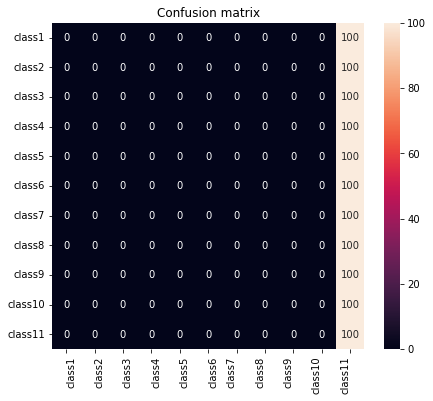

Precision:0.00826
Recall:0.0909
F1_score:0.0152
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.09      1.00      0.17       100

    accuracy                           0.09      1100
   macro avg       0.01      0.09      0.02      1100
weighted avg       0.01      0.09      0.02      1100

Epoch 1/100
8/8 [==============================] - 1s 99ms/step - loss: 2.4029 - accuracy: 0.0927 - val_loss: 2.3875 - val_accuracy: 0.1250

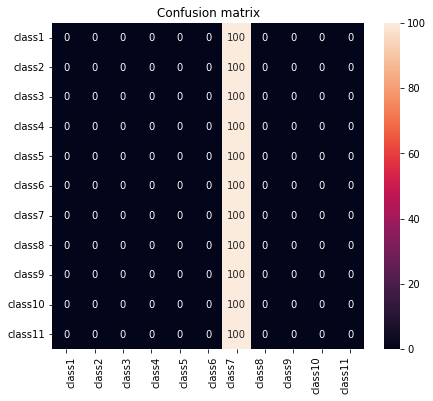

Precision:0.00826
Recall:0.0909
F1_score:0.0152
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.09      1.00      0.17       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100

    accuracy                           0.09      1100
   macro avg       0.01      0.09      0.02      1100
weighted avg       0.01      0.09      0.02      1100

Epoch 1/100
8/8 [==============================] - 1s 101ms/step - loss: 2.4004 - accuracy: 0.0944 - val_loss: 2.3979 - val_accuracy: 0.095

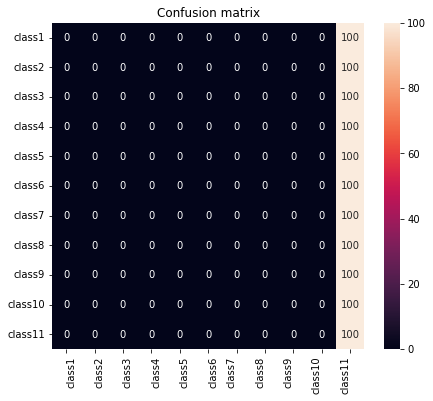

Precision:0.00826
Recall:0.0909
F1_score:0.0152
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.09      1.00      0.17       100

    accuracy                           0.09      1100
   macro avg       0.01      0.09      0.02      1100
weighted avg       0.01      0.09      0.02      1100

Epoch 1/100
8/8 [==============================] - 1s 100ms/step - loss: 2.3930 - accuracy: 0.0813 - val_loss: 2.3827 - val_accuracy: 0.088

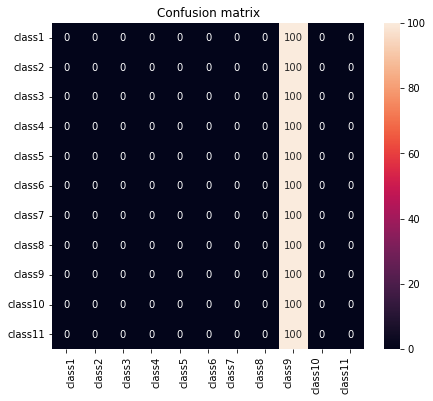

Precision:0.00826
Recall:0.0909
F1_score:0.0152
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.09      1.00      0.17       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100

    accuracy                           0.09      1100
   macro avg       0.01      0.09      0.02      1100
weighted avg       0.01      0.09      0.02      1100

Epoch 1/100
8/8 [==============================] - 1s 104ms/step - loss: 2.3998 - accuracy: 0.0894 - val_loss: 2.3981 - val_accuracy: 0.156

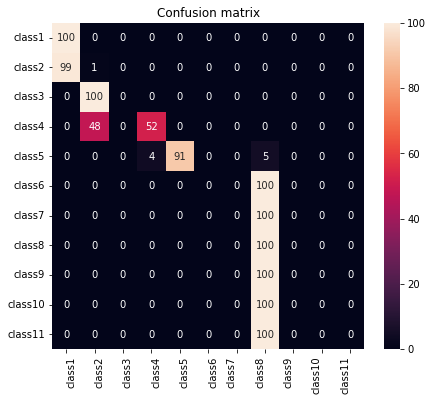

Precision:0.237
Recall:0.313
F1_score:0.235
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       100
           1       0.01      0.01      0.01       100
           2       0.00      0.00      0.00       100
           3       0.93      0.52      0.67       100
           4       1.00      0.91      0.95       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.17      1.00      0.28       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100

    accuracy                           0.31      1100
   macro avg       0.24      0.31      0.23      1100
weighted avg       0.24      0.31      0.23      1100


K-fold cross validation Accuracy: ['0.0909', '0.0909', '0.0909', '0.0909', '0.3127']


In [22]:
# 주어진 데이터를 학습 데이터와 테스트 데이터로 분리
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

accuracy = []

for train, validation in skf.split(x,y):
    model = keras.Sequential()
    model.add(Conv1D(16, 9, activation='relu', input_shape=(len(x[0]),1)))
    model.add(Conv1D(16, 9, activation='relu'))
    model.add(Conv1D(32, 9, activation='relu'))
    model.add(Conv1D(32, 9, activation='relu'))
    model.add(Conv1D(32, 9, activation='relu'))
    model.add(Conv1D(32, 9, activation='relu'))
    model.add(Conv1D(32, 9, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(11, activation="softmax"))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #model.summary()

  # 학습 데이터를 이용해서 학습
    hist = model.fit(x[train], y[train], epochs=100, batch_size=512, verbose=1, validation_split=0.1)  

  # 테스트 데이터를 이용해서 검증
    k_accuracy = '%.4f' % (model.evaluate(x[validation], y[validation])[1])
    accuracy.append(k_accuracy)
  
  #confusion matrix
    y_ = model.predict(x[validation])
    predicted = np.argmax(y_, axis = -1)

    classes = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7','class8', 'class9', 'class10','class11' ]
    conf_mat = confusion_matrix(y[validation], predicted)
    fig, ax = plt.subplots(figsize=(7,6))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.show()

  #정밀도, 재현도, f1-score
    precision = precision_score(y[validation], predicted, average='weighted')
    recall = recall_score(y[validation], predicted, average='weighted')
    f1 = f1_score(y[validation], predicted, average='weighted')

    print('Precision:{:.3}'.format(precision))
    print('Recall:{:.3}'.format(recall))
    print('F1_score:{:.3}'.format(f1))

  #분류 보고서
    print(classification_report(y[validation], predicted))

# 전체 검증 결과 출력
print('\nK-fold cross validation Accuracy: {}'.format(accuracy))

In [23]:
accuracy

['0.0909', '0.0909', '0.0909', '0.0909', '0.3127']

In [24]:
acc = list(map(float, accuracy))
acc

[0.0909, 0.0909, 0.0909, 0.0909, 0.3127]

In [25]:
np.mean(acc)

0.13526